<small><i>Updated February 2021 - This notebook was created by [Santi Seguí](https://ssegui.github.io/). </i></small>

# Blai Ras Jimenez

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;"><a class="anchor" id="what-is-a-recommender"></a><h3>Collaborative-based recommender systems</h3><br></div>


Given an "active user" (Santi) and an item that has not been seen by the user, the goal is to estimate the rating for the item.
<table style="width:60%">
  <tr>
    <td></td>
    <td>Superman</td> 
    <td>Star Wars 1</td>
    <td>Matrix</td>
    <td>Spiderman</td>
    
  </tr>
  <tr>
    <td>Santi</td>
    <td>3</td> 
    <td>3.5</td>
    <td>4.5</td>
    <td><font color="red"><b>¿?</b></font></td>
  </tr>
  <tr>
    <td>Jake</td>
    <td>3.5</td> 
    <td>4</td>
    <td>5</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Anne</td>
    <td>3</td> 
    <td><font color="red"><b>¿?</b></font></td>
    <td>4.5</td>
    <td>3</td>
  </tr>
  <tr>
    <td>Caroline</td>
    <td>3.5</td> 
    <td>5</td>
    <td>3.5</td>
    <td>2</td>
  </tr>
</table>

<br><br><br><br>

<h3>How to measure similarity between users?</h3>
The computation of the similarity between the items is one critical step in the CF algorithms. The basic idea in similarity computation between two users <i>a</i> and <i>b</i> is to first isolate the items commonly rated by both users (set <i>P</i>), and then to apply a similarity computation technique to determine the similarity.
    <ul>
    <li>Euclidean distance</li>
    $$sim(a,b) = 1 /(1+\sqrt{\sum_{p \in P}{(r_{a,p} - r_{b,p})^2}})$$
    <br>
    <li>Pearson Correlation</li>
    $$sim(a,b) = \frac{\sum_{p\in P} (r_{a,p}-\bar{r_a})(r_{b,p}-\bar{r_b})}{\sqrt{\sum_{p \in P}(r_{a,p}-\bar{r_a})²}\sqrt{\sum_{p \in P}(r_{b,p}-\bar{r_b})²}}$$
    <br>
    <li>Cosine distance</li>
    $$ sim(a,b) = \frac{\vec{a}· \vec{b}}{|\vec{a}| * |\vec{b}|}$$
    <br>
    </ul>
  
<br>
Where: 

* $sim(a,b)$ is the similarity between user "a" and user "b"
* $P$ is the set of common rated movies by user "a" and "b"
* $r_{a,p}$ is the rating of movie "p" by user "a"
* $\bar{r_a}$ is the mean rating given by user "a"

<br>

<h3>Some issues to take into accout</h3>
<ul>
<li>Pearson Correlation used to work better than euclidean distance since it is based more on the ranking than on the values.</li>
<li>Cosine distance is usually used when our data is binary/unary, i.e. like vs. not like  or buy vs. not buy.</li>
<li>What happens if two users have very few items in common?</li>
</ul>


<h3>How do we generate a prediction from the neighbour's ratings?</h3><br>

$$pred(a,p) = \frac{\sum_{b \in N}{sim(a,b)*(r_{b,p})}}{\sum_{b \in N}{sim(a,b)}}$$

Example:
<br>
<table style="width:100%">
  <tr>
    <td>Critic</td>
    <td>$sim(a,b)$</td> 
    <td>Rating Movie1: $r_{b,p_1}$</td>
    <td>$sim(a,b)*(r_{b,p_1})$</td>
    <td>Rating Movie2: $r_{b,p_2}$</td>
    <td>$sim(a,b)*(r_{b,p_2})$</td>
    
  </tr>
  <tr>
    <td>User1</td>
    <td>0.99</td> 
    <td>3</td>
    <td>2.97</td>
    <td>2.5</td>
    <td>2.48</td>
    
  </tr>
  <tr>
    <td>User2</td>
    <td>0.38</td> 
    <td>3</td>
    <td>1.14</td>
    <td>3</td>
    <td>1.14</td>
  </tr>
  <tr>
    <td>User3</td>
    <td>0.89</td>
    <td>4.5</td>
    <td>4.0</td>
    <td> - </td>
    <td> - </td>
  </tr>
  <tr>
    <td>User4</td>
    <td>0.92</td>
    <td>3</td>
    <td>2.77</td>
    <td>3</td>
    <td>2.77</td>
  </tr>
  <tr>
    <td>$\sum_{b \in N}{sim(a,b)*(r_{b,p})}$</td>
    <td></td> 
    <td></td>
    <td>10.87</td>
    <td></td>
    <td>6.39</td>
  </tr>
  <tr>
    <td>$\sum_{b \in N}{sim(a,b)}$</td>
    <td></td> 
    <td></td>
    <td>3.18</td>
    <td></td>
    <td>2.29</td>
  </tr>
  <tr>
  <td>$pred(a,p)$</td>
    <td></td> 
    <td></td>
    <td>3.41</td>
    <td></td>
    <td>2.79</td>
  </tr>
</table>


<br>
<h3><br><b>How improve this prediction function?</b></h3>
<h4> 1) Normalization: Predicitions scaled to the user domain.</h4><br>
Users rate differntly, some rate high, while other low. This is the prediction function that was used in the original in Netflix system. Using this function we are scaling the prediction to our mean.<br>

$$pred(a,p) = \bar{r_a} + \frac{\sum_{b \in N}{sim(a,b)*(r_{b,p}-\bar{r_b})}}{\sum_{b \in N}{sim(a,b)}}$$
<br>


Example:<br>
Preciction for the user "a" with  $\bar{r_a} = 3.5$
<table style="width:100%">
  <tr>
    <td>Critic</td>
    <td>$sim(a,b)$</td> 
    <td>Mean Ratings: $\bar{r_b}$</td>
    <td>Rating Movie1: $r_{b,p_1}$</td>
    <td>$sim(a,b)*(r_{b,p_1}-\bar{r_b})$</td>

    
  </tr>
  <tr>
    <td>User1</td>
    <td>0.99</td> 
    <td>4.3</td> 
    <td>3</td>
    <td>-1.28</td>

    
  </tr>
  <tr>
    <td>User2</td>
    <td>0.38</td> 
    <td>2.73</td> 
    <td>3</td>
    <td>0.10</td>

  </tr>
  <tr>
    <td>User3</td>
    <td>0.89</td>
    <td>3.12</td>  
    <td>4.5</td>
    <td>1.22</td>

  </tr>
  <tr>
    <td>User4</td>
    <td>0.92</td>
    <td>3.98</td>  
    <td>3</td>
    <td>-0.90</td>

  </tr>
  <tr>
    <td>$\sum_{b \in N}{sim(a,b)*(r_{b,p}-\bar{r_b})}$</td>
    <td></td> 
    <td></td>
    <td></td>
    <td>-1.13</td>

  </tr>
  <tr>
    <td>$\sum_{b \in N}{sim(a,b)}$</td>
    <td></td> 
    <td></td>
    <td></td>
    <td>3.84</td>

  </tr>
  <tr>
  <td>$pred(a,p)$</td>
    <td></td> 
    <td></td>
    <td></td>
    <td>3.20</td>

  </tr>
</table>

<h4> 2) Not all neighbor rating might be equally.</h4><br>
Agreeement on commonly liked items is not as important as agreeement on controversial items. we can give a weigth correlated with the rating variance.

<h4> 3) Value of number of co-rated items</h4>
Reduce the similarity between users when the number of co-rated items is low or discard those users with a small number of co-rated items

<h4> 4) Case amplificiation </h4>
Increase the weigth to those users which are really really similars (~= 1)

<h4> 5) Neighborhood selection</h4>
Only a subset of similar user used to be used. Not-similar users used to be discarded

<h4> 6) Recursive Methods</h4>
In order to avoid cold-start we can apply a recursive method for new users.




<h3>Problems:</h3><br>
<ul>
<li>"Memory-based" approach</li>
<li>Need to be trained offline and updateted periodically</li>
</ul>

<h3>Evaluation: performance criterion</h3>
Performance evaluation of recommendation systems is an entire topic all in itself. Some of the options include:<br>
* $RMSE = \sqrt{(\frac{\sum(\hat{y}-y)^2}{n})}$
<br>
* Precision / Recall / F-scores
* ROC curves
* Cost curves

In [1]:
def compute_rmse(y_pred, y_true):
    """ Compute Root Mean Squared Error. """
    return np.sqrt(np.mean(np.power(y_pred - y_true, 2)))

<h5>Download Movilens Database</h5>
There is three different version of the database containing 100k, 1m and 10m ratings. We can download the smallest version for this demo.
http://grouplens.org/datasets/movielens/



In [2]:
#NETFLIX REAL 50.000.000 usuaris and 100.000 items
%autosave 150
%matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt

# Load Data set
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('data/ml-100k/u.user', sep='|', names=u_cols)

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('data/ml-100k/u.data', sep='\t', names=r_cols)

# the movies file contains columns indicating the movie's genres
# let's only load the first three columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date']
movies = pd.read_csv('data/ml-100k/u.item', sep='|', names=m_cols, usecols=range(3), encoding='latin-1')

# Construcció del DataFrame
data = pd.merge(pd.merge(ratings, users), movies)
data = data[['user_id','title', 'movie_id','rating','release_date','sex','age']]


print("La BD has "+ str(data.shape[0]) +" ratings")
print("La BD has ", data.user_id.nunique()," users")
print("La BD has ", data.movie_id.nunique(), " movies")
data.head()


Autosaving every 150 seconds
La BD has 100000 ratings
La BD has  943  users
La BD has  1682  movies


user_id         title  movie_id  rating release_date sex  age
0      196  Kolya (1996)       242       3  24-Jan-1997   M   49
1      305  Kolya (1996)       242       5  24-Jan-1997   M   23
2        6  Kolya (1996)       242       4  24-Jan-1997   M   42
3      234  Kolya (1996)       242       4  24-Jan-1997   M   60
4       63  Kolya (1996)       242       3  24-Jan-1997   M   31

##### Divide the data in two sets: training and test

In [3]:
def assign_to_set(df):
    sampled_ids = np.random.choice(df.index,
                                   size=np.int64(np.ceil(df.index.size * 0.2)),
                                   replace=False)
    df.loc[sampled_ids, 'for_testing'] = True
    return df

data['for_testing'] = False
grouped = data.groupby('user_id', group_keys=False).apply(assign_to_set)
data_train = data[grouped.for_testing == False]
data_test = data[grouped.for_testing == True]
print(data_train.shape)
print(data_test.shape)
print(data_train.index & data_test.index)

print("Training data_set has "+ str(data_train.shape[0]) +" ratings")
print("Test data set has "+ str(data_test.shape[0]) +" ratings")
print("La BD has ", data.movie_id.nunique(), " movies")


(79619, 8)
(20381, 8)
Int64Index([], dtype='int64')
Training data_set has 79619 ratings
Test data set has 20381 ratings
La BD has  1682  movies


##### How to get the set of movies from user with id  "1"?

In [4]:
data_train[data_train.user_id==1].head(5)

user_id                              title  movie_id  rating  \
14          1                       Kolya (1996)       242       5   
417         1             Shall We Dance? (1996)       251       4   
708         1  Ace Ventura: Pet Detective (1994)        67       3   
940         1             Raising Arizona (1987)       238       4   
2363        1                  Home Alone (1990)        94       2   

     release_date sex  age  for_testing  
14    24-Jan-1997   M   24        False  
417   11-Jul-1997   M   24        False  
708   01-Jan-1994   M   24        False  
940   01-Jan-1987   M   24        False  
2363  01-Jan-1990   M   24        False

##### Mean Rating of movies seen by user "1"

In [5]:
data_train[data_train.user_id==1].rating.mean()

3.5668202764976957

##### Mean rating of movie with title "Seven (Se7en) (1995)"

In [6]:
data_train.rating[data_train.title=="Seven (Se7en) (1995)"].mean()

3.841463414634146

##### Which are the 10 most rated movies?

In [7]:
data_train.groupby('title').size().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 463
Fargo (1996)                     415
Contact (1997)                   408
Return of the Jedi (1983)        406
English Patient, The (1996)      383
Liar Liar (1997)                 383
Scream (1996)                    362
Toy Story (1995)                 359
Independence Day (ID4) (1996)    348
Godfather, The (1972)            336
dtype: int64

##### Which are the 10 movies with the highest score

In [8]:
data_train.groupby('title').rating.mean().sort_values(ascending=False).head(10)

title
They Made Me a Criminal (1939)                       5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Tough and Deadly (1995)                              5.0
Santa with Muscles (1996)                            5.0
Some Mother's Son (1996)                             5.0
Star Kid (1997)                                      5.0
Saint of Fort Washington, The (1993)                 5.0
Two or Three Things I Know About Her (1966)          5.0
Prefontaine (1997)                                   5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Name: rating, dtype: float64

In [9]:
data_train.groupby('title').rating.mean().sort_values().tail(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Two or Three Things I Know About Her (1966)          5.0
Saint of Fort Washington, The (1993)                 5.0
Star Kid (1997)                                      5.0
Some Mother's Son (1996)                             5.0
Santa with Muscles (1996)                            5.0
Tough and Deadly (1995)                              5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
They Made Me a Criminal (1939)                       5.0
Name: rating, dtype: float64

##### Top movies rated more than 10 times

In [10]:
size = data_train.groupby('title').size()
mean_score = data_train.groupby('title').rating.mean()
mean_score[size>10].sort_values(ascending=False).head()

title
Close Shave, A (1995)               4.505263
Casablanca (1942)                   4.490099
Schindler's List (1993)             4.487288
Wrong Trousers, The (1993)          4.452381
Shawshank Redemption, The (1994)    4.441964
Name: rating, dtype: float64

##### Which is the distibution of rated movies per user?

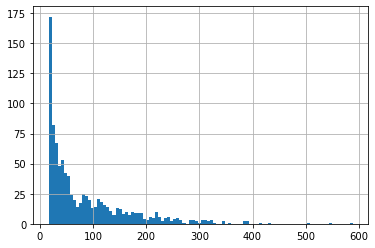

In [11]:
rated_movies = data_train.groupby('user_id').size().sort_values(ascending=False)
rated_movies.hist(bins=100)


In [12]:
def top_movies(dataFrame,usr):
    max_i = dataFrame[dataFrame.user_id == usr].rating.max() 
    print("Max puntuation of user", usr, "is:", max_i)
    return dataFrame[(dataFrame['user_id'] == usr) & (dataFrame['rating'] == max_i )].title

print(top_movies(data,2))

Max puntuation of user 2 is: 5
32                        Kolya (1996)
424             Shall We Dance? (1996)
4627             Secrets & Lies (1996)
6455          L.A. Confidential (1997)
11911                     Fargo (1996)
32768            Godfather, The (1972)
33462                 Star Wars (1977)
55954                   Titanic (1997)
58130    Wings of the Dove, The (1997)
63360     Sense and Sensibility (1995)
71232         Good Will Hunting (1997)
78981                      Emma (1996)
82001        As Good As It Gets (1997)
Name: title, dtype: object


##### <h5>Which is the similarity between user 1 and user 2?</h5> <h6>Let's look first for the common seen movies by the users </h6>

In [13]:
# dataframe with the data from user 1
data_user_1 = data_train[data_train.user_id==1]
# dataframe with the data from user 2
data_user_2 = data_train[data_train.user_id==2]
# We first compute the set of common movies
common_movies = set(data_user_1.movie_id).intersection(data_user_2.movie_id)
print("\nNumber of common movies",len(common_movies),'\n')

# creat the subdataframe with only with the common movies
mask = (data_user_1.movie_id.isin(common_movies))
data_user_1 = data_user_1[mask]
print(data_user_1[['title','rating']].head())

mask = (data_user_2.movie_id.isin(common_movies))
data_user_2 = data_user_2[mask]
print(data_user_2[['title','rating']].head())



Number of common movies 12 

                        title  rating
14               Kolya (1996)       5
417    Shall We Dance? (1996)       4
3479      Men in Black (1997)       4
5247  Mighty Aphrodite (1995)       5
6080   Full Monty, The (1997)       5
                        title  rating
32               Kolya (1996)       5
424    Shall We Dance? (1996)       5
3510      Men in Black (1997)       4
5270  Mighty Aphrodite (1995)       4
6129   Full Monty, The (1997)       4


In [14]:
r = pd.merge(data_user_1[['user_id','movie_id','rating']],data_user_2[['user_id','movie_id','rating']],on='movie_id')

r.rating_x,r.rating_y

(0     5
 1     4
 2     4
 3     5
 4     5
 5     5
 6     5
 7     5
 8     2
 9     5
 10    5
 11    3
 Name: rating_x, dtype: int64,
 0     5
 1     5
 2     4
 3     4
 4     4
 5     3
 6     5
 7     5
 8     4
 9     4
 10    4
 11    2
 Name: rating_y, dtype: int64)

<h6>Let's define a function to compute the users similarity </h6>

In [4]:
from scipy.stats import pearsonr
from scipy.spatial.distance import euclidean

# Returns a distance-based similarity score for person1 and person2
def SimEuclid(DataFrame,User1,User2,min_common_items=1):
    # GET MOVIES OF USER1
    movies_user1=DataFrame[DataFrame['user_id'] ==User1 ]
    # GET MOVIES OF USER2
    movies_user2=DataFrame[DataFrame['user_id'] ==User2 ]
    
    # FIND SHARED FILMS
    rep=pd.merge(movies_user1 ,movies_user2,on='movie_id')    
    if len(rep)<2:
        return 0
    if(len(rep)<min_common_items):
        return 0
    #return distEuclid(rep['rating_x'],rep['rating_y']) 
    return 1.0/(1.0+euclidean(rep['rating_x'],rep['rating_y'])) 

# Returns a pearsonCorrealation-based similarity score for person1 and person2
def SimPearson(DataFrame,User1,User2,min_common_items=1):
    # GET MOVIES OF USER1
    movies_user1=DataFrame[DataFrame['user_id'] ==User1 ]
    # GET MOVIES OF USER2
    movies_user2=DataFrame[DataFrame['user_id'] ==User2 ]
    
    # FIND SHARED FILMS
    rep=pd.merge(movies_user1 ,movies_user2,on='movie_id',)
    if len(rep)<2:
        return 0    
    if(len(rep)<min_common_items):
        return 0    
    res=pearsonr(rep['rating_x'],rep['rating_y'])[0]
    if(np.isnan(res)):
        return 0
    return res

print(SimPearson(data_train,1,2))
print(SimEuclid(data_train,1,2))

0.24112141108520602
0.20521309615767264


In [5]:
# Check similarities between users. 
# What do you think about the results? 
# Create a new user (YOU) and rate some movies.  Check the most similar users to you

In [6]:
newUser = pd.read_csv('newUser.csv', sep='|')
newUser.head()

user_id                          title  movie_id  rating release_date sex  \
0      944            12 Angry Men (1957)       178       5  01-Jan-1957   M   
1      944   2001: A Space Odyssey (1968)       135       5  01-Jan-1968   M   
2      944  Affair to Remember, An (1957)       966       4  01-Jan-1957   M   
3      944   Age of Innocence, The (1993)       387       5  01-Jan-1993   M   
4      944                   Alien (1979)       183       4  01-Jan-1979   M   

   age  
0   61  
1   61  
2   61  
3   61  
4   61

In [7]:
frames = [data,newUser]
data = pd.concat(frames,ignore_index=True)

In [8]:
data[data['user_id']==944]

user_id                                   title  movie_id  rating  \
100000      944                     12 Angry Men (1957)       178       5   
100001      944            2001: A Space Odyssey (1968)       135       5   
100002      944           Affair to Remember, An (1957)       966       4   
100003      944            Age of Innocence, The (1993)       387       5   
100004      944                            Alien (1979)       183       4   
100005      944                    All About Eve (1950)       606       5   
100006      944                       Annie Hall (1977)       514       4   
100007      944                   Apocalypse Now (1979)       180       5   
100008      944             Arsenic and Old Lace (1944)       659       5   
100009      944                   Before Sunrise (1995)       955       4   
100010      944                   Big Sleep, The (1946)       525       5   
100011      944                     Blade Runner (1982)        89       5   
100012      944                       Casablanca (1942)       483       5   
100013      944                  Cinema Paradiso (1988)       170       5   
100014      944                     Citizen Kane (1941)       134       5   
100015      944                     East of Eden (1955)       492       4   
100016      944                            Fargo (1996)       100       4   
100017      944             Fish Called Wanda, A (1988)       153       4   
100018      944                   Godfather, The (1972)       127       5   
100019      944                       GoodFellas (1990)       182       5   
100020      944              Great Dictator, The (1940)       524       5   
100021      944                        High Noon (1952)       661       5   
100022      944                  His Girl Friday (1940)       494       5   
100023      944                L.A. Confidential (1997)       302       4   
100024      944               Lawrence of Arabia (1962)       511       4   
100025      944              Maltese Falcon, The (1941)       484       4   
100026      944       Man Who Would Be King, The (1975)       530       5   
100027      944  Nightmare Before Christmas, The (1993)        91       4   
100028      944                        Ninotchka (1939)       836       4   
100029      944                   Paths of Glory (1957)       641       4   
100030      944          Philadelphia Story, The (1940)       478       5   
100031      944                           Psycho (1960)       185       5   
100032      944                     Pulp Fiction (1994)        56       4   
100033      944                   Quiet Man, The (1952)       648       4   
100034      944            Rebel Without a Cause (1955)       506       4   
100035      944          Remains of the Day, The (1993)        86       4   
100036      944                    Roman Holiday (1953)       487       4   
100037      944                 Schindler's List (1993)       318       4   
100038      944        Silence of the Lambs, The (1991)        98       4   
100039      944              Singin' in the Rain (1952)       705       4   
100040      944                 Some Like It Hot (1959)       482       5   
100041      944                     Sunset Blvd. (1950)       488       5   
100042      944                   Third Man, The (1949)       513       4   
100043      944               To Be or Not to Be (1942)      1204       5   
100044      944                       Unforgiven (1992)       203       5   
100045      944                          Vertigo (1958)       479       5   
100046      944          When Harry Met Sally... (1989)       216       4   

       release_date sex  age for_testing  
100000  01-Jan-1957   M   61         NaN  
100001  01-Jan-1968   M   61         NaN  
100002  01-Jan-1957   M   61         NaN  
100003  01-Jan-1993   M   61         NaN  
100004  01-Jan-1979   M   61         NaN  
100005  01-Jan-1950   M   61         NaN  
100006  01

<h5>Let's build a Recommender System</h5>

In [10]:
class CollaborativeFiltering:
    """ Collaborative filtering using a custom sim(u,u'). """
    
    def __init__(self,DataFrame, similarity=SimPearson):
        """ Constructor """
        self.sim_method=similarity# Gets recommendations for a person by using a weighted average
        self.df=DataFrame
        self.sim = {}
        
    def fit(self):
        """ Prepare data structures for estimation. Similarity matrix for users """
        allUsers=set(self.df['user_id'])
        for person1 in allUsers:
            self.sim.setdefault(person1, {})
            a=data_train[data_train['user_id']==person1][['movie_id']]
            data_reduced=pd.merge(data_train,a,on='movie_id')
            for person2 in allUsers:
                if person1==person2: continue
                self.sim.setdefault(person2, {})
                if(person1 in self.sim[person2]):continue # since is a simetric matrix
                sim=self.sim_method(data_reduced,person1,person2)
                if(sim<0):
                    self.sim[person1][person2]=0
                    self.sim[person2][person1]=0
                else:
                    self.sim[person1][person2]=sim
                    self.sim[person2][person1]=sim
                
    def predict(self, user_id, movie_id):
        totals={}
        movie_users=self.df[self.df['movie_id'] ==movie_id]
        rating_num=0.0
        rating_den=0.0
        allUsers=set(movie_users['user_id'])
        for other in allUsers:
            if user_id==other: continue 
            rating_num += self.sim[user_id][other] * float(movie_users[movie_users['user_id']==other]['rating'])
            rating_den += self.sim[user_id][other]
        if rating_den==0: 
            if self.df.rating[self.df['movie_id']==movie_id].mean()>0:
                # return the mean movie rating if there is no similar for the computation
                return self.df.rating[self.df['movie_id']==movie_id].mean()
            else:
                # else return mean user rating 
                return self.df.rating[self.df['user_id']==user_id].mean()
        return rating_num/rating_den



### Let's create a small dataset in order to reduce the computation cost and speedup the calculus in the class

In [9]:
# for the development stage I'm create a new smaller dataset. In this way I will no have to wait that much
dataSmall = data[(data['user_id']<100) | (data['user_id']==944)] # get only data from 100 users

print(dataSmall.shape)

dataSmall.loc[:,'for_testing'] = False
grouped = dataSmall.groupby('user_id', group_keys=False).apply(assign_to_set)
dataSmall_train = dataSmall[grouped.for_testing == False]
dataSmall_test = dataSmall[grouped.for_testing == True]

print(dataSmall_train.shape )
print(dataSmall_test.shape )

print('Usuaris:', dataSmall.user_id.nunique() )
print('Films:',dataSmall.movie_id.nunique() )

(11007, 8)
(8764, 8)
(2243, 8)
Usuaris: 100
Films: 1232


C:\Users\blair\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
reco = CollaborativeFiltering(dataSmall_train)
reco.fit()

C:\Users\blair\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [15]:
reco.predict(user_id=944,movie_id=9)

4.310344827586207

In [10]:
def evaluate(predict_f,data_train,data_test):
    """ RMSE-based predictive performance evaluation with pandas. """
    ids_to_estimate = zip(data_test.user_id, data_test.movie_id)
    list_users = set(data_train.user_id)
    estimated = np.array([predict_f(u,i) if u in list_users else 3 for (u,i) in ids_to_estimate ])
    real = data_test.rating.values
    return compute_rmse(estimated, real)

In [17]:
print('RMSE for Collaborative Recomender: %s' % evaluate(reco.predict,dataSmall_train,dataSmall_test))

RMSE for Collaborative Recomender: 0.999463957598698


<div class  = "alert alert-success"><b>EXERCISE 1</b><p>
Modify the Recomender System using as a prediction function the following equation:
$$pred(a,p) = \bar{r_a} + \frac{\sum_{b \in N}{sim(a,b)*(r_{b,p}-\bar{r_b})}}{\sum_{b \in N}{sim(a,b)}}$$

</div>

In [18]:
class CollaborativeFilteringEx1:
    """ Collaborative filtering using a custom sim(u,u'). """
    
    def __init__(self,DataFrame, similarity=SimPearson):
        """ Constructor """
        self.sim_method=similarity# Gets recommendations for a person by using a weighted average
        self.df=DataFrame
        self.sim = {}
        
    def fit(self):
        """ Prepare data structures for estimation. Similarity matrix for users """
        allUsers=set(self.df['user_id'])
        for person1 in allUsers:
            self.sim.setdefault(person1, {})
            a=data_train[data_train['user_id']==person1][['movie_id']]
            data_reduced=pd.merge(data_train,a,on='movie_id')
            for person2 in allUsers:
                if person1==person2: continue
                self.sim.setdefault(person2, {})
                if(person1 in self.sim[person2]):continue # since is a simetric matrix
                sim=self.sim_method(data_reduced,person1,person2)
                if(sim<0):
                    self.sim[person1][person2]=0
                    self.sim[person2][person1]=0
                else:
                    self.sim[person1][person2]=sim
                    self.sim[person2][person1]=sim
                
    def predict(self, user_id, movie_id):
        totals={}
        movie_users=self.df[self.df['movie_id'] ==movie_id]
        rating_num=0.0
        rating_den=0.0
        allUsers=set(movie_users['user_id'])
        for other in allUsers:
            if user_id==other: continue 
            #First modification requested in Exercice 1: substract on the den mean user b rating of the movie (line 31)
            rating_num += self.sim[user_id][other] * (float(movie_users[movie_users['user_id']==other]['rating'])
                                                      - float(self.df.rating[self.df['user_id']==other].mean()))
            rating_den += self.sim[user_id][other]
        if rating_den==0: 
            if self.df.rating[self.df['movie_id']==movie_id].mean()>0:
                # return the mean movie rating if there is no similar for the computation
                return self.df.rating[self.df['movie_id']==movie_id].mean()
            else:
                # else return mean user rating 
                return self.df.rating[self.df['user_id']==user_id].mean()
                                                      
        #Second modification requested in Exercice 1: addition of the mean rating of user a
        return self.df.rating[self.df['user_id']==user_id].mean() + (rating_num/rating_den)

In [19]:
reco1 = CollaborativeFilteringEx1(dataSmall_train)
reco1.fit()

In [20]:
reco1.predict(user_id=944,movie_id=1)

4.0

In [21]:
print('RMSE for Collaborative Recomender: %s' % evaluate(reco1.predict,dataSmall_train,dataSmall_test))

RMSE for Collaborative Recomender: 0.9820156590647304


<div class="alert alert-success">
    <b>EXERCISE 2:</b><br>
Modify the recomender system from the previous exercice, with one that in order to estimate the score of a movie B for the user A only uses the subset of the N most similar users to user A. Define N as a parameter of the Recommender.
</div>

In [89]:
class CollaborativeFilteringEx2:
    """ Collaborative filtering using a custom sim(u,u'). """
    
    def __init__(self,DataFrame,N,similarity=SimPearson):
        """ Constructor """
        self.sim_method=similarity# Gets recommendations for a person by using a weighted average
        self.df=DataFrame
        self.sim = {}
        self.N = N
        
    def fit(self):
        """ Prepare data structures for estimation. Similarity matrix for users """
        allUsers=set(self.df['user_id'])
        for person1 in allUsers:
            self.sim.setdefault(person1, {})
            a=data_train[data_train['user_id']==person1][['movie_id']]
            data_reduced=pd.merge(data_train,a,on='movie_id')
            for person2 in allUsers:
                if person1==person2: continue
                self.sim.setdefault(person2, {})
                if(person1 in self.sim[person2]):continue # since is a simetric matrix
                sim=self.sim_method(data_reduced,person1,person2)
                if(sim<0):
                    self.sim[person1][person2]=0
                    self.sim[person2][person1]=0
                else:
                    self.sim[person1][person2]=sim
                    self.sim[person2][person1]=sim
        return self.sim
                
    def predict(self, user_id, movie_id):
        totals={}
        movie_users=self.df[self.df['movie_id'] ==movie_id]
        rating_num=0.0
        rating_den=0.0
        
        similarUsers = self.getSimilarUsers(movie_users,user_id)
        
        for other in similarUsers:
            #I removed the id of the own user in the getSimilarUsers function.
            #if user_id==other: continue 
            rating_num += self.sim[user_id][other] * (float(movie_users[movie_users['user_id']==other]['rating'])
                                                      - float(self.df.rating[self.df['user_id']==other].mean()))
            rating_den += self.sim[user_id][other]
        if rating_den==0: 
            if self.df.rating[self.df['movie_id']==movie_id].mean()>0:
                # return the mean movie rating if there is no similar for the computation
                return self.df.rating[self.df['movie_id']==movie_id].mean(),similarUsers
            else:
                # else return mean user rating 
                return self.df.rating[self.df['user_id']==user_id].mean(),similarUsers
        
        return self.df.rating[self.df['user_id']==user_id].mean() + (rating_num/rating_den),similarUsers
    
    
    # Function that returns the most N similar users id
    def getSimilarUsers(self,movie_users,user1,min_common_items=1):
        allUsers=set(movie_users['user_id'])
        topUsers = [[user,SimPearson(movie_users,user1,user,min_common_items)] for user in allUsers]
        topDF = pd.DataFrame(topUsers, columns=['user', 'similarity'])
        topDF = topDF.sort_values(by=['similarity'], ascending=False)
        topUsers = list(topDF['user'].values)
        if user1 in topUsers:
            topUsers.remove(user1)
            self.N += 1
        return topUsers[:self.N]

In [90]:
reco2 = CollaborativeFilteringEx2(dataSmall_train,N=20)
sim = reco2.fit()

In [93]:
similarUsers, predict = reco2.predict(user_id=944,movie_id=1)

# Create a new user (YOU) and rate some movies.  Check the most similar users to you

print("Top 20 most similar users to me (user 944):",predict,"\nPrediction of movie 1:",similarUsers)

Top 20 most similar users to me (user 944): [1, 59, 63, 64, 65, 67, 70, 72, 73, 75, 77, 79, 81, 82, 83, 84, 89, 92, 93, 94] 
Prediction of movie 1: 3.933333333333333


In [31]:
print('RMSE for Collaborative Recomender: %s' % evaluate(reco2.predict,dataSmall_train,dataSmall_test))

RMSE for Collaborative Recomender: 0.9828881052872236


<div class  = "alert alert-success"><b>EXERCISE 3</b><p>
Modify the similarity function with the following:
$$new\_sim(a,b) = sim(a,b) * \frac{min(50,|P_{ab}|)}{50} $$
where $|P_{ab}|$ is the number of common items with user $a$ and user $b$
</div>

In [32]:
def new_sim(DataFrame,User1,User2,min_common_items=1,nItems=50):
     # GET MOVIES OF USER1
    movies_user1=DataFrame[DataFrame['user_id'] ==User1 ]
    # GET MOVIES OF USER2
    movies_user2=DataFrame[DataFrame['user_id'] ==User2 ]
    
    # FIND SHARED FILMS
    rep=pd.merge(movies_user1 ,movies_user2,on='movie_id',)
    if len(rep)<2:
        return 0    
    if(len(rep)<min_common_items):
        return 0    
    res=pearsonr(rep['rating_x'],rep['rating_y'])[0]
    res = res * min(nItems,len(rep))
    res = res / nItems
    if(np.isnan(res)):
        return 0
    return res

In [33]:
reco3 = CollaborativeFilteringEx2(dataSmall_train,N=20,similarity=new_sim)
sim = reco3.fit()

In [34]:
reco3.predict(user_id=944,movie_id=1)

4.0

In [35]:
print('RMSE for Collaborative Recomender: %s' % evaluate(reco3.predict,dataSmall_train,dataSmall_test))

RMSE for Collaborative Recomender: 0.9891876800598128


<div class  = "alert alert-success"><b>EXERCISE 4</b><p>
Is there a set of users where the systems work better than with othes users?
Does it depend on the number of rating per user? Explain your conclusions and try to alleviate this problem
</div>

It does depend. If we take a look at the similarity matrix, we will see a large amount of zeros, meaning that we are dealing with a very sparse matrix. This means that yes, our users do not tend to do a lot of reviews in comparison to the large amount of movies that we have. 


Sidenote: at first, I tried to prove that this was the problem by:

1. Computing the similarity between each user and the amount of reviews of each user. Check if this two variables are correlated. (They are not)

2. Computing the RMSE of each user and the amount of reviews of each user. Check it this two variables are correlated. (Ambiguous result, but mainly not)

In [73]:
totalZeros=0
for dict in sim.values():
    totalZeros += sum(value == 0. for value in dict.values())
print(totalZeros)

4526


We can apply a wide range of solutions, but I will name the ones that I think that they are the most important or the ones we've seen in class:

* 1) Case amplification <br> 
When taking the most N similar users, take one or two and increase it's weight, giving even more importance to its ratings and trying to give a more accurate prediction.
* 2) Recursive Methods<br> 
If the reason of why we have this big amount of zeros is because we did not have time to collect more users reviews (cold-start), we can apply a recursive method for new users.

* 4) Change our recommender to be item-based and not user-based (exercise 5)

* 3) Choose only a subset of our users that have performed more than X reviews<br> 
I don't know if this is technically a solution but it proves the problem of our current system. We can find the code of this solution below. (Took 20 min to compute)


In [75]:
def dfByReviews(nReviews,nUsers,reviewsDF):
    
    valuesFilter = reviewsDF[reviewsDF['numReviews']>=nReviews]['user_id'].values
    
    dataSmall = data[data['user_id']<nUsers]
    
    dataSmall = dataSmall[dataSmall['user_id'].isin(valuesFilter)]
    

    dataSmall.loc[:,'for_testing'] = False
    grouped = dataSmall.groupby('user_id', group_keys=False).apply(assign_to_set)
    dataSmall_train = dataSmall[grouped.for_testing == False]
    dataSmall_test = dataSmall[grouped.for_testing == True]


    print('Usuaris:', dataSmall.user_id.nunique() )
    print('Films:',dataSmall.movie_id.nunique() )
    return dataSmall_train,dataSmall_test

In [79]:
train,test= dfByReviews(200,1000,reviews)

Usuaris: 149
Films: 1649


In [ ]:
reco4 = reco3 = CollaborativeFilteringEx2(train,N=20,similarity=new_sim)
reco4.fit()

In [84]:
print('RMSE of the Recommender with min. reviews of 200: %s' % evaluate(reco4.predict,train,test))

RMSE of the Recommender with min. reviews of 200: 0.9276176706438699


<div class  = "alert alert-success"><b>EXERCISE 5</b><p>
Create a Item-Based recomender system and compare its performance agains the User-Based
</div>

Let me first define the adjusted cosine function as similarity function:

$$pred(u,i) = \frac{\sum_{j \in P_i(u)}{sim(i,j)*r_{u,j}}}{\sum_{j \in P_i(u)}{sim(i,j)}}$$

In [69]:
def cosine_similarity(reviewItem1,reviewItem2,means):
    ratings = pd.merge(reviewItem1,reviewItem2,on='user_id')
    ratings = ratings[ratings["movie_id_x"] != ratings["movie_id_y"]]
    
    #We need users that have reviewed both movies
    if ratings.shape[0] == 0: 
        return 0
    
    ratingsAndMeans = pd.merge(ratings, means, on='user_id')

    ratingsAndMeans['similarity_num'] = (ratingsAndMeans["rating_x"]
                                         -ratingsAndMeans["rating"])*(ratingsAndMeans["rating_y"]-ratingsAndMeans["rating"])
    ratingsAndMeans['similarity_denom'] = (ratingsAndMeans["rating_x"]-ratingsAndMeans["rating"])**2
    ratingsAndMeans['similarity_denom2'] = (ratingsAndMeans["rating_y"]-ratingsAndMeans["rating"])**2
    if np.sum(ratingsAndMeans["similarity_num"])==0:
        return 0
    else:
        return np.sum(ratingsAndMeans["similarity_num"])/np.sqrt(np.sum(ratingsAndMeans["similarity_denom"])
                                                              *np.sum(ratingsAndMeans["similarity_denom"]))

The evaluate function now lists all the movies (instead of users) and starts computing its RMSE:

In [75]:
def evaluateEx5(predictF,data_train,data_test):
    """ RMSE-based predictive performance evaluation with pandas. """
    ids_to_estimate = zip(data_test.movie_id, data_test.user_id)
    list_movies = set(data_train.movie_id)
    estimated = np.array([predictF(u,i) if u in list_movies else 3 for (u,i) in ids_to_estimate ])
    real = data_test.rating.values
    return compute_rmse(estimated, real)

And now the global recommender with some changes:

* Fit function <br>
Iterate over movies instead of users. With two pair of movies, get the users and ratings of those two and compute the cosine similarity. Create the similarity matrix.

* Predict function <br>
Same as before: changing user by movie and getting the similarity value with the class dictionary. The formula used is the one in Exercice 1:

$$pred(a,p) = \bar{r_a} + \frac{\sum_{b \in N}{sim(a,b)*(r_{b,p}-\bar{r_b})}}{\sum_{b \in N}{sim(a,b)}}$$

In [66]:
class CollaborativeFilteringEx5:
    """ Collaborative filtering using a custom sim(u,u'). """
    
    def __init__(self,DataFrame,similarity=SimPearson):
        """ Constructor """
        self.sim_method=similarity# Gets recommendations for a person by using a weighted average
        self.df=DataFrame
        self.sim = {}
        
    def fit(self):
        """ Prepare data structures for estimation. Similarity matrix for users """
        #Compute the mean user review values
        means = self.df.groupby('user_id',as_index=False)['rating'].agg('mean')
        allMovies=set(self.df['movie_id'])
        for movie in allMovies:
            self.sim.setdefault(movie,{})
            a = self.df[self.df['movie_id']==movie][['user_id']]
            data_reduced = pd.merge(data_train,a,on='user_id')
            reviewsMovie1 = data_reduced[data_reduced['movie_id']==movie][['user_id', 'movie_id', 'rating']]
            for movie2 in allMovies:
                reviewsMovie2 = data_reduced[data_reduced['movie_id']==movie2][['user_id', 'movie_id', 'rating']]
                if movie2 in allMovies:
                    #While building the matrix we ignore finding the same movie or repeating all the process again (simmetric matrix)
                    if movie==movie2: continue
                    self.sim.setdefault(movie2,{})
                    if movie in self.sim[movie2]:
                        continue
                    sim=self.sim_method(reviewsMovie1,reviewsMovie2,means)
                if(sim<0):
                    self.sim[movie][movie2]=0
                    self.sim[movie2][movie]=0
                else:
                    self.sim[movie][movie2]=sim
                    self.sim[movie2][movie]=sim

                
    def predict(self, user_id, movie_id):
        moviesWatched = self.df[self.df['user_id']==user_id]
        rating_num=0.0
        rating_den=0.0
        allMovies=set(moviesWatched['movie_id'])
        
        for other in allMovies:
            if movie_id==other: continue
            rating_num += self.sim[movie_id][other] * (float(moviesWatched[moviesWatched['movie_id']==other]['rating'])
                                                      - float(self.df.rating[self.df['movie_id']==other].mean()))
            
            rating_den += self.sim[movie_id][other]
        if rating_den==0: 
            if self.df.rating[self.df['movie_id']==movie_id].mean()>0:
                # return the mean movie rating if there is no similar for the computation
                return self.df.rating[self.df['movie_id']==movie_id].mean()
            else:
                # else return mean user rating 
                return self.df.rating[self.df['user_id']==user_id].mean()
                                                      
        return self.df.rating[self.df['movie_id']==movie_id].mean() + (rating_num/rating_den)


In [74]:
reco5 = CollaborativeFilteringEx5(dataSmall_train,similarity=cosine_similarity)
reco5.fit()

In [76]:
print('RMSE for Collaborative Recomender: %s' % evaluateEx5(reco5.predict,dataSmall_train,dataSmall_test))

RMSE for Collaborative Recomender: 1.28375195986087


## Comparison

At first **I though that a item-based recommender would give better results** than user-based, but, as we can see above, the RMSE obtained is 1.28. Recall that with the user-based we got an RMSE we got values >1.

After obtaining this results I changed the predict function to the one used in exercise 1, and got more or less the same error. I **also changed the predict function to gather the first N most similar movies**, and the error got up!


We also have to take in consideration that the train and test splits are done randomly: maybe a **movie_id appears in data_test and not on data_train!**. Also, I would like to remark that the fitting computational time for the item-based recommender is huge in comparison with the user-based: ~1 hour for the first one whilst the second one takes a couple of minutes. That's completely normal: we are **comparing similarities between items and there are more films than users!**
